# HepMC3 Interface: IO and visualization

impy uses the pyhepmc library for event IO and visualization. Visualization of the event is useful to understand the particle history. Not all generators produce a history. Here we generate an event with Pythia6 which has full history.

For the visualization to work, the optional package graphviz is required.

In [1]:
import impy.models as im
from impy.kinematics import EventKinematics
from impy.constants import GeV
from particle import literals as lp

In [2]:
ekin = EventKinematics(
    ecm=100 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Pythia6(ekin, seed=1)

# decay pi0 in the generator
model.set_stable(lp.pi_0.pdgid, False)

# generate one event
for event in model(1):
    pass

1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                                          **
 **                                                                          **
 **              *......*                  Welcome to the Lund Monte Carlo!  **
 **         *:::!!:::::::::::*                                               **
 **      *::::::!!::::::::::::::*          PPP  Y   Y TTTTT H   H III   A    **
 **    *::::::::!!::::::::::::::::*        P  P  Y Y    T   H   H  I   A A   **
 **   *:::::::::!!:::::::::::::::::*       PPP    Y     T   HHHHH  I  AAAAA  **
 **   *:::::::::!!:::::::::::::::::*       P      Y     T   H   H  I  A   A  **
 **    *::::::::!!::::::::::::::::*!       P      Y     T   H   H III A   A  **
 **      *::::::!!::::::::::::::* !!    

To get a look at the event, we can call its `repr`, but the output is a bit confusing. impy gives access to the Fortran HepEvt record, which is a very compact and efficient format, but it is not easy to see what is going on.

In [3]:
event

PYTHIA6Event(kin=Event kinematics:
	ecm      :  100.00000
	pcm      :   49.98239
	elab     : 5328.01821
	plab     : 5328.01813
	gamma_cm :   53.28956
	bgamm_cm :   53.28018
	pdgid 1  :       2212
	nucprop 1: 1/1.0
	pdgid 2  :       2212
	nucprop 2: 1/1.0
, frame='center-of-mass', nevent=0, pid=array([ 2212,  2212,     2,     2,     2,     2,     2,     2,     2,
          21,  2101,     2,    21,  2101,    92,   321,   333,  -313,
         221,  -211,   221,  2212,    92,   323,  -311,  2114, -2114,
         113,   111,  2112,   111, -2212,   211,  2112,   321,  -321,
        -321,   211,    22,    22,    22,    22,   311,   211,   310,
        2112,   111, -2112,   111,   211,  -211,    22,    22,    22,
          22,   310,    22,    22,    22,    22], dtype=int32), status=array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Fundamentally, a collision is a directed graph. The HepMC3 library represents events directly in graph format. This is particularly useful to visualize the event. We convert the impy event to HepMC3 format.

In [4]:
hev = event.to_hepmc3()

If you have `graphviz` installed, the HepMC3 event will be visualized directly in the notebook.

In [5]:
hev

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(0, 0, 49.9912, 50), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(0, 0, -49.9912, 50), mass=0.93827, pid=2212, status=3), GenParticle(FourVector(-2.21744, 1.60511, -0.396684, 2.766), mass=-0, pid=2, status=3), GenParticle(FourVector(-1.14534, -0.741589, -24.7992, 24.8367), mass=-0, pid=2, status=3), GenParticle(FourVector(-2.21744, 1.60511, -0.396684, 2.766), mass=0, pid=2, status=3), GenParticle(FourVector(-1.14534, -0.741589, -24.7992, 24.8367), mass=0, pid=2, status=3), GenParticle(FourVector(-1.46872, 1.3197, 0.305325, 2.02506), mass=0.33, pid=2, status=3), GenParticle(FourVector(-1.89406, -0.456179, -25.5012, 25.5777), mass=0.33, pid=2, status=3), GenParticle(FourVector(-1.46872, 1.3197, 0.305325, 2.02506), mass=0.33, pid=2, status=2), GenParticle(FourVector(0.2278, -0.386137, -6.46449, 6.48001), mass=0, pid=21, status=2), GenParticle(FourVector(1.14534, 0.741589, -17.0157, 17.0801), mass=0.57933, pid=2101, status=2), GenParticle(FourVector(-1.89406, -0.456179, -25.5012, 25.5777), mass=0.33, pid=2, status=2), GenParticle(FourVector(-0.2278, 0.386137, 1.23839, 1.31705), mass=0, pid=21, status=2), GenParticle(FourVector(2.21744, -1.60511, 47.4377, 47.5201), mass=0.57933, pid=2101, status=2), GenParticle(FourVector(-0.0955787, 1.67515, -23.1748, 25.5852), mass=10.7105, pid=92, status=2), GenParticle(FourVector(-0.288119, 0.608272, -0.0157354, 0.834803), mass=0.4936, pid=321, status=1), GenParticle(FourVector(-0.288228, -0.301291, -0.92336, 1.43829), mass=1.0209, pid=333, status=2), GenParticle(FourVector(-0.507592, 0.820769, -1.5356, 2.03586), mass=0.924855, pid=-313, status=2), GenParticle(FourVector(-0.972233, -0.398864, -2.16673, 2.46956), mass=0.54745, pid=221, status=2), GenParticle(FourVector(0.396884, 0.51177, -2.30518, 2.39849), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.839034, -0.0261949, -4.44882, 4.5603), mass=0.54745, pid=221, status=2), GenParticle(FourVector(0.724674, 0.460693, -11.7794, 11.8479), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(0.0955787, -1.67515, 23.1748, 74.4148), mass=70.6943, pid=92, status=2), GenParticle(FourVector(-1.13012, 0.0174919, -14.1789, 14.2542), mass=0.928916, pid=323, status=2), GenParticle(FourVector(-0.578264, -0.486173, -3.75241, 3.85992), mass=0.49767, pid=-311, status=2), GenParticle(FourVector(0.136895, 0.0411152, -2.52361, 2.79633), mass=1.19602, pid=2114, status=2), GenParticle(FourVector(0.100833, 0.0726898, -2.83292, 3.08788), mass=1.22234, pid=-2114, status=2), GenParticle(FourVector(-0.392925, -0.075644, -1.39403, 1.71663), mass=0.918364, pid=113, status=2), GenParticle(FourVector(-0.00619332, 0.34431, 0.547728, 0.660919), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.365839, -0.61526, 3.91846, 4.09261), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(0.591456, 0.292805, 0.661709, 0.944264), mass=0.13498, pid=111, status=2), GenParticle(FourVector(-0.424009, -0.184269, 2.88915, 3.07266), mass=0.93827, pid=-2212, status=1), GenParticle(FourVector(0.104581, -0.138506, 3.2766, 3.28416), mass=0.13957, pid=211, status=1), GenParticle(FourVector(2.05916, -0.943715, 36.5631, 36.6452), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(-0.126132, -0.102631, -0.289124, 0.594706), mass=0.4936, pid=321, status=1), GenParticle(FourVector(-0.162096, -0.198661, -0.634236, 0.843586), mass=0.4936, pid=-321, status=1), GenParticle(FourVector(-0.625885, 0.550241, -1.34588, 1.65817), mass=0.4936, pid=-321, status=1), GenParticle(FourVector(0.118293, 0.270528, -0.189726, 0.377696), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.828344, -0.138717, -1.25098, 1.50677), mass=0, pid=22, status=1), GenParticle(FourVector(-0.143888, -0.260148, -0.915749, 0.962797), mass=0, pid=22, status=1), GenParticle(FourVector(0.496379, 0.135297, -1.46872, 1.55623), mass=0, pid=22, status=1), GenParticle(FourVector(0.342655, -0.1614

This scalable SVG image is generated with the function `pyhepmc.view.to_dot`, which produces a `DiGraph` object. It is possible to manipulate this object, for example, to change the size of the image. For details, see the `graphviz` docs.

In [6]:
from pyhepmc.view import to_dot

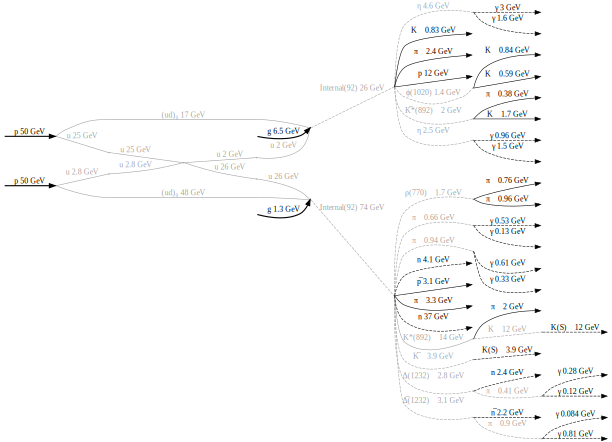

In [7]:
d = to_dot(hev)
d.graph_attr["size"] = "8.5,7"
d

One can also change the engine to produce a very different visualization.

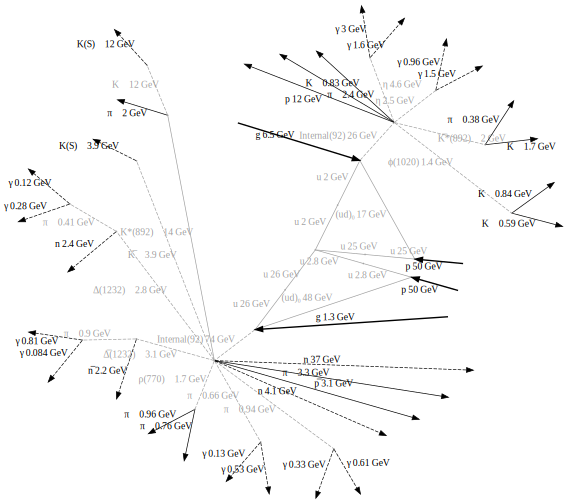

In [8]:
d.engine = "twopi"
d

Also important is the ability to save events and to pass them to other HEP software. The HepMC format is the common language in particle physics, which all tools understand. `pyhepmc` offers a Pythonic way to read/write events with an `open` function.

impy events can be written to disk directly without manual conversion to HepMC3 format, because `pyhepmc` respects the following protocol. If a foreign event object has a method called `to_hepmc3`, it is called to convert the event automatically before writing.

In [9]:
import pyhepmc

with pyhepmc.open("pythia6.dat", "w") as f:
    f.write(event)  # both event and hev work here

The format is human-readable ASCII.

In [10]:
with open("pythia6.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 25 60
U GEV MM
P 1 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 4.9991195718917339e+01 4.9999999999999993e+01 9.3827000000000005e-01 3
P 2 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 -4.9991195718917339e+01 4.9999999999999993e+01 9.3827000000000005e-01 3
P 3 1 2 -2.2174363196889622e+00 1.6051111219707062e+00 -3.9668400541852389e-01 2.7660014001993316e+00 -0.0000000000000000e+00 3
P 4 2 2 -1.1453394165687130e+00 -7.4158880118951165e-01 -2.4799221822255184e+01 2.4836730044806892e+01 -0.0000000000000000e+00 3
P 5 3 2 -2.2174363196889622e+00 1.6051111219707059e+00 -3.9668400541852655e-01 2.7660014001993334e+00 0.0000000000000000e+00 3
P 6 4 2 -1.1453394165687132e+00 -7.4158880118951132e-01 -2.4799221822255184e+01 2.4836730044806895e+01 0.0000000000000000e+00 3
V -5 0 [5,6]
P 7 -5 2 -1.4687183707062668e+00 1.3197017333108578e+00 3.0532549010652854e-01 2.0250604860750534e+00 3.3000000000000002e-01 3
P 8 -5 2 -1.89

We can also handle incomplete records, like the one from SIBYLL-2.1.

In [11]:
ekin = EventKinematics(
    ecm=100 * GeV, p1pdg=2212, p2pdg=2212
)

model = im.Sibyll21(ekin, seed=1)

# generate one event
for event2 in model(1):
    pass

 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
    1   1.259E+01    1.49   38.27   31.16   11.10  -0.127   1.949   0.006


Sibyll-2.1 has no particle history and no vertex information. Accordingly, the graph looks a bit boring.

In [12]:
hev2 = event2.to_hepmc3()
hev2

GenEvent(momentum_unit=1, length_unit=0, event_number=0, particles=[GenParticle(FourVector(-0.635971, -0.0672664, 1.59014, 1.87824), mass=0.7683, pid=-213, status=2), GenParticle(FourVector(0.200857, -0.10327, 1.81845, 1.99378), mass=0.7683, pid=213, status=2), GenParticle(FourVector(0.0869196, -0.167857, 11.4413, 11.4439), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.573066, 0.102756, 11.9166, 11.9316), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.482803, 0.131023, 10.6492, 10.7023), mass=0.93957, pid=2112, status=1), GenParticle(FourVector(0.84267, 0.238444, 0.672027, 1.65346), mass=1.231, pid=2224, status=2), GenParticle(FourVector(-0.539898, 0.0418962, 0.542579, 0.791132), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.170536, 0.119178, 3.03662, 3.14531), mass=0.7683, pid=213, status=2), GenParticle(FourVector(-0.109312, -0.116333, 7.3606, 7.40231), mass=0.7683, pid=-213, status=2), GenParticle(FourVector(0.109422, -0.203655, -1.68333, 1.70449), mass=0.13497, pid=111, status=1), GenParticle(FourVector(-0.0349611, 0.0250843, -47.3442, 47.3535), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(-0.0979388, -0.239919, 1.03005, 1.07128), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(-0.538038, 0.172651, 0.560101, 0.806984), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.318482, -0.314527, 1.46222, 1.53983), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.117623, 0.211257, 0.356249, 0.453964), mass=0.13497, pid=111, status=1), GenParticle(FourVector(0.566113, 0.151195, 0.731485, 1.32618), mass=0.93827, pid=2212, status=1), GenParticle(FourVector(0.27656, 0.087249, -0.0594558, 0.32728), mass=0.13957, pid=211, status=1), GenParticle(FourVector(0.382078, -0.0516394, 2.38836, 2.42738), mass=0.13957, pid=211, status=1), GenParticle(FourVector(-0.211541, 0.170818, 0.648286, 0.71795), mass=0.13497, pid=111, status=1), GenParticle(FourVector(-0.127179, 0.16062, 6.08, 6.08505), mass=0.13957, pid=-211, status=1), GenParticle(FourVector(0.017866, -0.276954, 1.28066, 1.31732), mass=0.13497, pid=111, status=1)], vertices=[GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0)), GenVertex(FourVector(0, 0, 0, 0))], run_info=None)

The serialized output is more compact then.

In [13]:
with pyhepmc.open("sibyll21.dat", "w") as f:
    f.write(event2)
    
with open("sibyll21.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
E 0 5 21
U GEV MM
P 1 0 -213 -6.3597112894058228e-01 -6.7266426980495453e-02 1.5901356935501099e+00 1.8782439231872559e+00 7.6829999685287476e-01 2
P 2 0 213 2.0085695385932922e-01 -1.0326969623565674e-01 1.8184542655944824e+00 1.9937760829925537e+00 7.6829999685287476e-01 2
P 3 0 -211 8.6919613182544708e-02 -1.6785664856433868e-01 1.1441325187683105e+01 1.1443866729736328e+01 1.3956999778747559e-01 1
P 4 0 211 -5.7306587696075439e-01 1.0275574028491974e-01 1.1916608810424805e+01 1.1931638717651367e+01 1.3956999778747559e-01 1
P 5 0 2112 4.8280328512191772e-01 1.3102297484874725e-01 1.0649200439453125e+01 1.0702265739440918e+01 9.3957000970840454e-01 1
P 6 0 2224 8.4267032146453857e-01 2.3844376206398010e-01 6.7202734947204590e-01 1.6534589529037476e+00 1.2309999465942383e+00 2
P 7 0 -211 -5.3989845514297485e-01 4.1896231472492218e-02 5.4257899522781372e-01 7.9113227128982544e-01 1.3956999778747559e-01 1
P 8 0 213 1.705355644226